# IMBD movie reviews prediction

Using neural network

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

In [0]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


In [0]:
max_features=5000
maxlen=200
batch_size=64
embedding_dims=128

In [5]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...


In [6]:
list(x_train[0][0:10])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [7]:
y_train[0:5]

array([1, 0, 0, 1, 0])

In [8]:
for sample in range(10):
  print(x_train[sample])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 11

In [9]:
type(x_train)

numpy.ndarray

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000, 200)
(25000,)
(25000, 200)
(25000,)


In [13]:
for sample in range(10):
  print(x_train[sample])

[   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223    2   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117    2   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194    2   18    4  226   22   21  134  476   26  480    5  144
   30    2   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113  103   32   15   16
    2 

In [14]:
print(list(x_train[0]))

[5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


We have 25000 rows and 200 columns now. train[0] shows how 1st row looks like with 200 columns with it

# Build model

In [15]:
model = Sequential()
model.add(Embedding(max_features, embedding_dims,input_length=maxlen)) # input_length how much size a sentence will have i.e 200
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### compile

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 128)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________


### Fitting model

In [18]:
history=model.fit(x_train, y_train,
          batch_size=32,
          epochs=5,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 384s - loss: 0.4734 - acc: 0.7791 - val_loss: 0.3715 - val_acc: 0.8450
Epoch 2/5
 - 384s - loss: 0.3576 - acc: 0.8485 - val_loss: 0.4218 - val_acc: 0.8054
Epoch 3/5
 - 383s - loss: 0.3016 - acc: 0.8762 - val_loss: 0.3437 - val_acc: 0.8616
Epoch 4/5
 - 382s - loss: 0.2564 - acc: 0.8956 - val_loss: 0.3371 - val_acc: 0.8671
Epoch 5/5
 - 383s - loss: 0.2138 - acc: 0.9161 - val_loss: 0.3450 - val_acc: 0.8680


In [0]:
y_pred = model.predict(x_test, verbose=0)

In [20]:
y_pred[:5]

array([[0.09919301],
       [0.99851143],
       [0.26896727],
       [0.40748826],
       [0.99980605]], dtype=float32)

## evaluate the model

In [0]:

train_acc = model.evaluate(x_train, y_train, verbose=0)
test_acc = model.evaluate(x_test, y_test, verbose=0)


In [25]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=32,
                            verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

 - 103s - loss: 0.3450 - acc: 0.8680
Test score: 0.3450383945798874
Test accuracy: 0.868


## Visualize Results

In [0]:
from matplotlib import pyplot

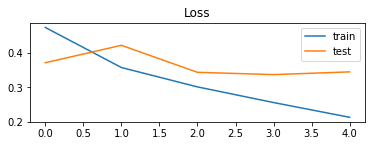

In [27]:
# plot loss 
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

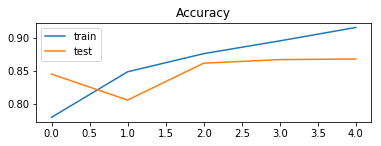

In [28]:
# plot accuracy
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [38]:
print("Test Accuracy: {:.4f}".format(acc))
print("Test Loss: {:.4f}".format(score))

Test Accuracy: 0.8680
Test Loss: 0.3450


# AUC/ROC

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [0]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)

In [0]:
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)

In [34]:
yhat_probs

array([[0.09919301],
       [0.99851143],
       [0.26896727],
       ...,
       [0.03613818],
       [0.15450224],
       [0.27464658]], dtype=float32)

In [35]:
yhat_classes

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

Already in 1D so, we need not to reduce dimension

Otherwise command is

**reduce to 1d array** <br>
yhat_probs = yhat_probs[:, 0]<br>
yhat_classes = yhat_classes[:, 0]<br>

## Accuracy: 

(tp + tn) / (p + n)

In [37]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.868000


# Precision: 

tp / (tp + fp)

In [0]:
precision = precision_score(y_test, yhat_classes)

In [41]:
precision

0.8823773898586866

# recall: 

tp / (tp + fn)

In [43]:
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)

Recall: 0.849200


# f1:

2 tp / (2 tp + fp + fn)

In [45]:
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

F1 score: 0.865471


# kappa

In [46]:
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.736000


# ROC AUC

In [47]:
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

ROC AUC: 0.938082


# confusion matrix

In [48]:
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

[[11085  1415]
 [ 1885 10615]]


In [0]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

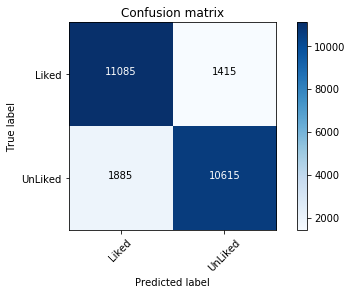

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat_classes)
plot_confusion_matrix(cm, classes=['Liked', 'UnLiked'])

In [49]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     12500
           1       0.88      0.85      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

